In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data.csv")

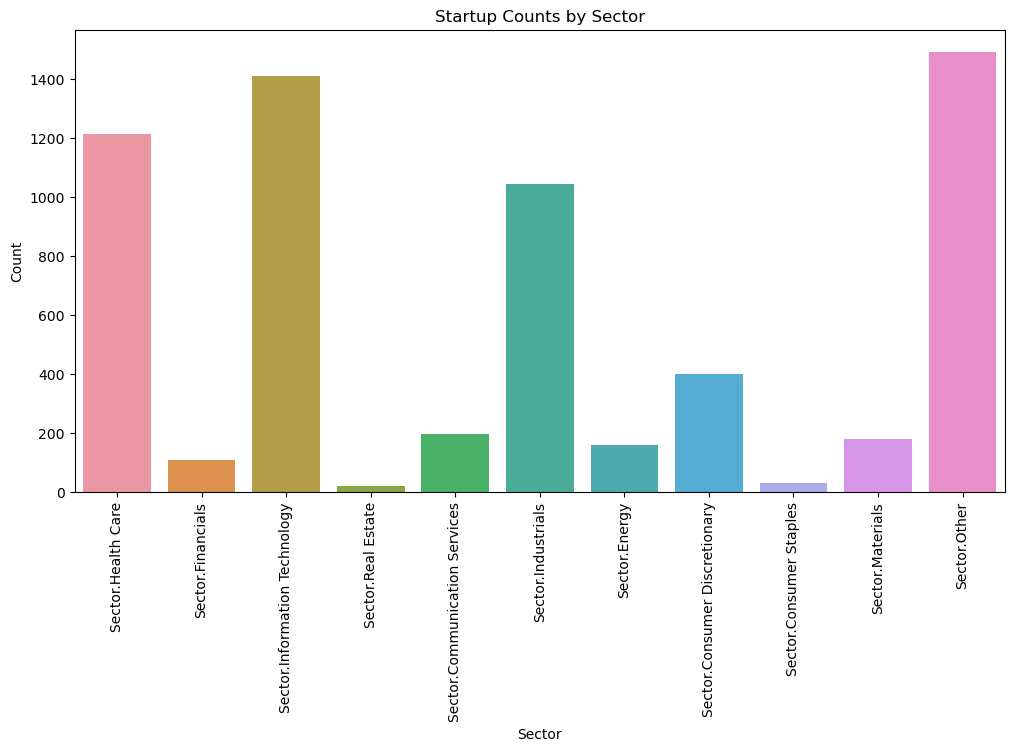

In [5]:
sector_counts = data[["Sector.Health Care", "Sector.Financials", "Sector.Information Technology", "Sector.Real Estate", "Sector.Communication Services", "Sector.Industrials", "Sector.Energy", "Sector.Consumer Discretionary", "Sector.Consumer Staples", "Sector.Materials", "Sector.Other"]].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_counts.index, y=sector_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Startup Counts by Sector')
plt.show()

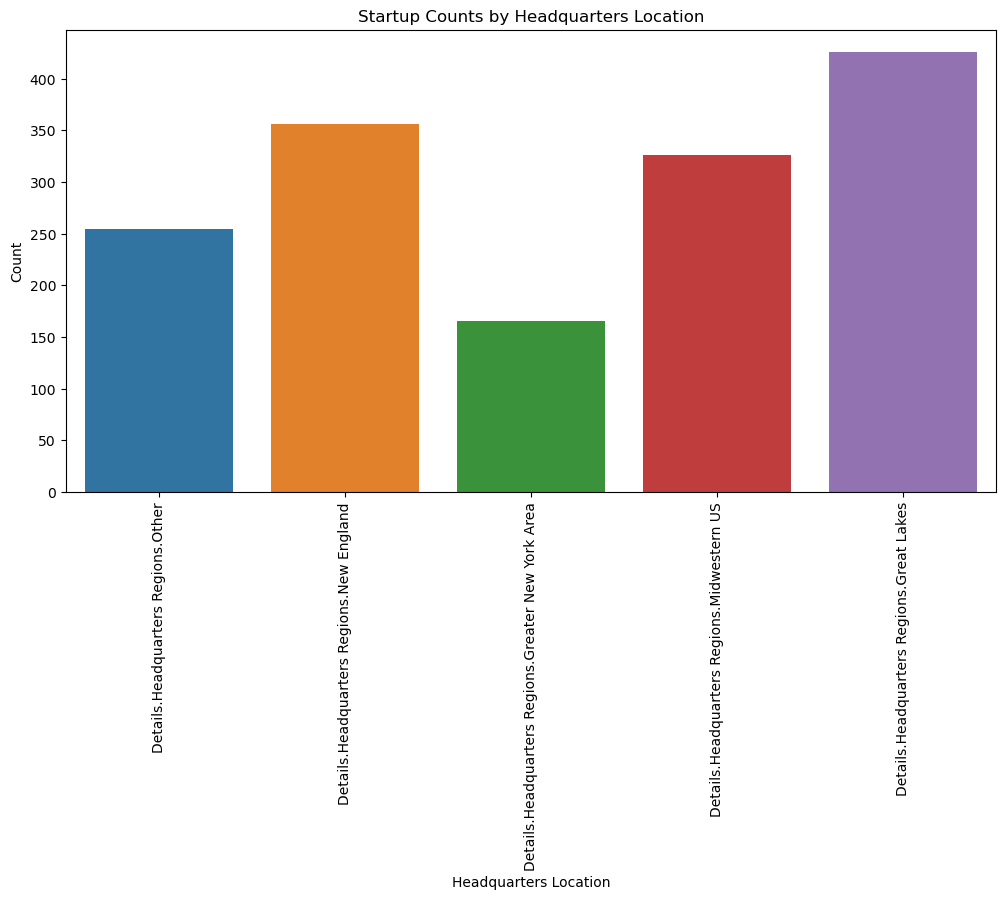

In [7]:
sector_counts = data[["Details.Headquarters Regions.Other",	"Details.Headquarters Regions.New England",	"Details.Headquarters Regions.Greater New York Area", "Details.Headquarters Regions.Midwestern US", "Details.Headquarters Regions.Great Lakes"]].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_counts.index, y=sector_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Headquarters Location')
plt.ylabel('Count')
plt.title('Startup Counts by Headquarters Location')
plt.show()

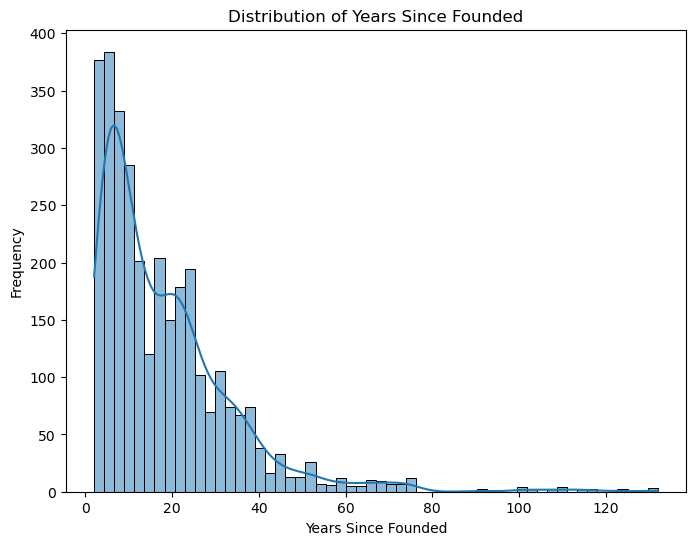

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Details.Years Since Founded', bins=56, kde=True)
plt.xlabel('Years Since Founded')
plt.ylabel('Frequency')
plt.title('Distribution of Years Since Founded')
plt.show()

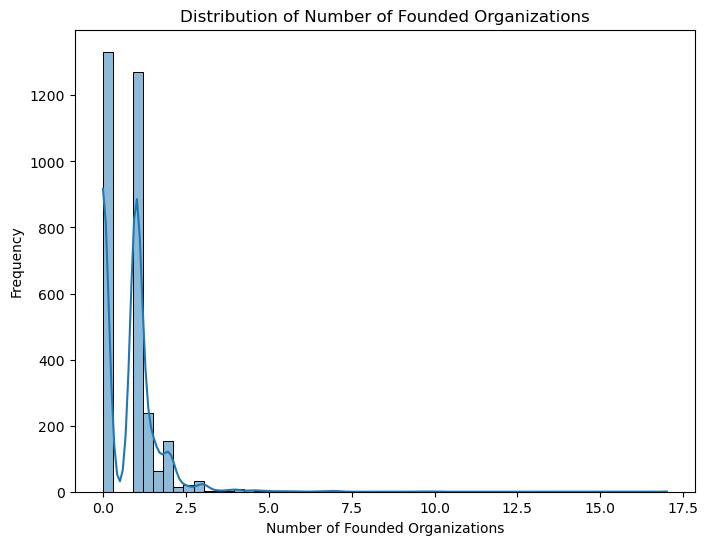

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Overview.Number of Founded Organizations', bins=56, kde=True)
plt.xlabel('Number of Founded Organizations')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Founded Organizations')
plt.show()

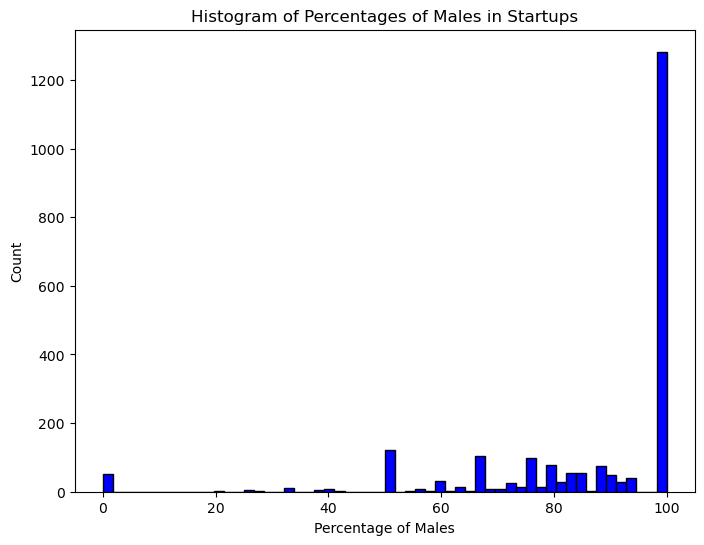

In [53]:
data['Total_Gender'] = data['Overview.Gender.Male'] + data['Overview.Gender.Female']

data['Male_Percentage'] = (data['Overview.Gender.Male'] / data['Total_Gender']) * 100

# Create a histogram of the male percentage
plt.figure(figsize=(8, 6))
plt.hist(data['Male_Percentage'], bins=56, color='blue', edgecolor='black')
plt.xlabel('Percentage of Males')
plt.ylabel('Count')
plt.title('Histogram of Percentages of Males in Startups')
plt.show()

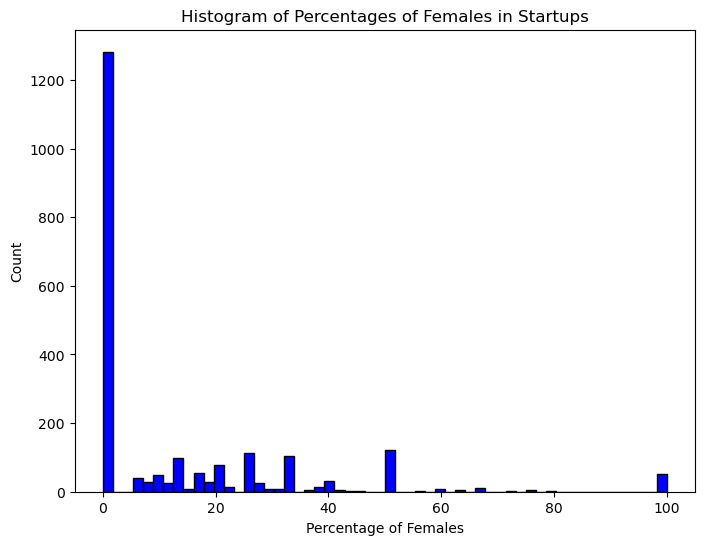

In [55]:
data['Total_Gender'] = data['Overview.Gender.Male'] + data['Overview.Gender.Female']

data['Female_Percentage'] = (data['Overview.Gender.Female'] / data['Total_Gender']) * 100

plt.figure(figsize=(8, 6))
plt.hist(data['Female_Percentage'], bins=56, color='blue', edgecolor='black')
plt.xlabel('Percentage of Females')
plt.ylabel('Count')
plt.title('Histogram of Percentages of Females in Startups')
plt.show()

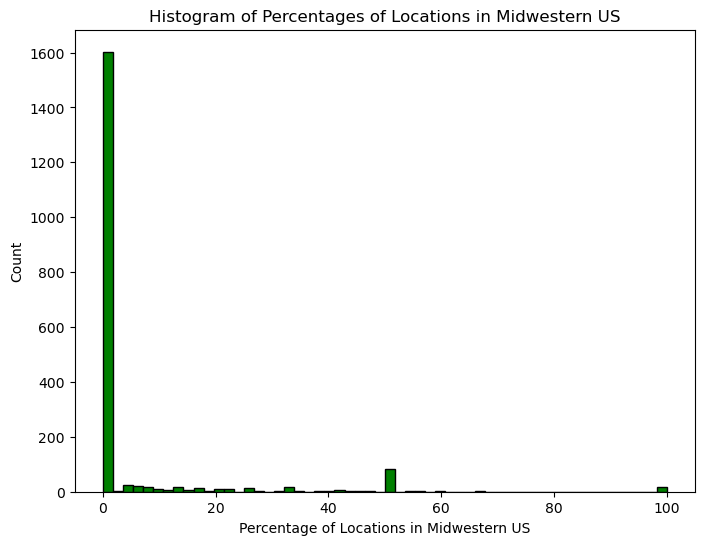

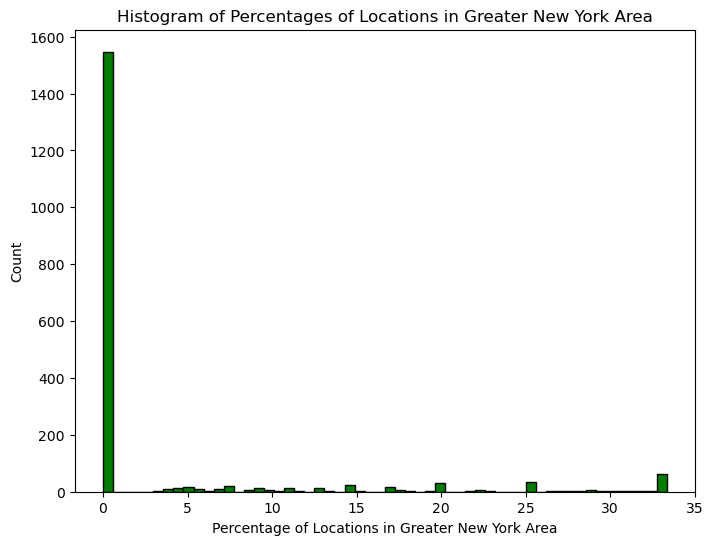

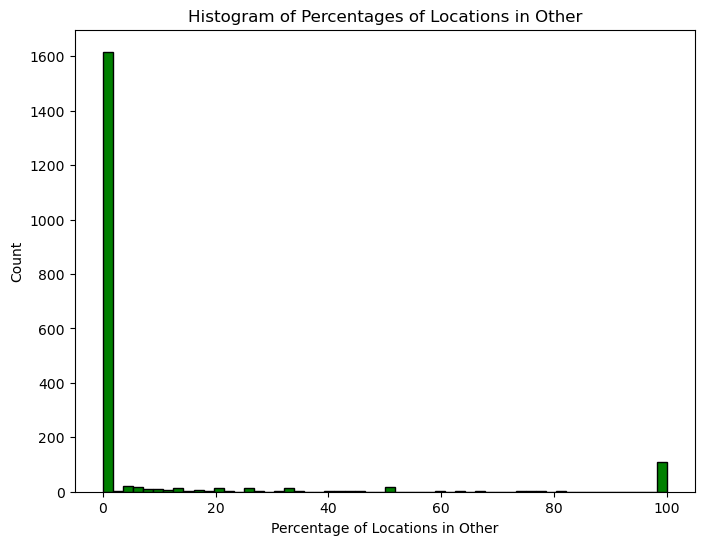

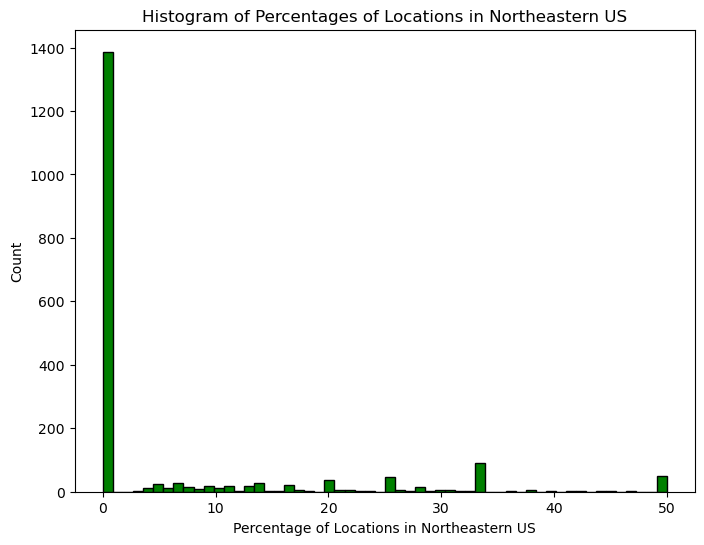

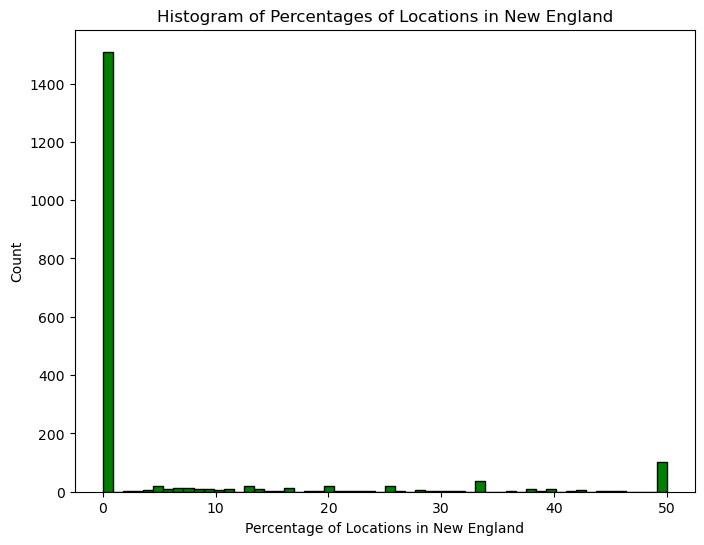

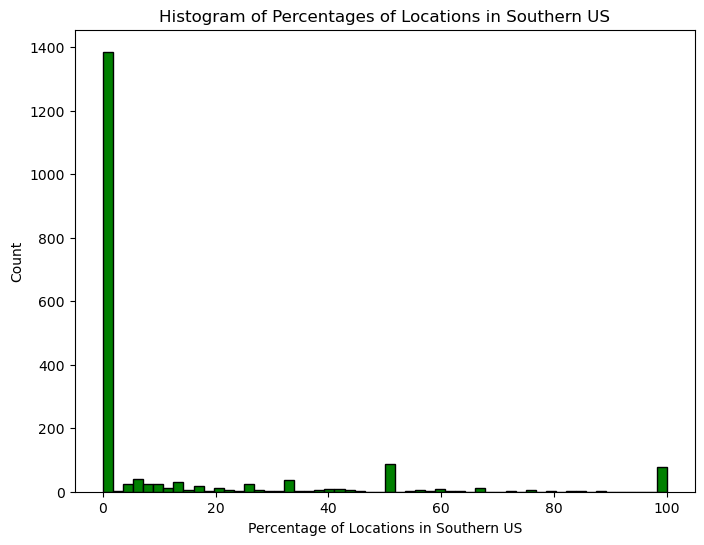

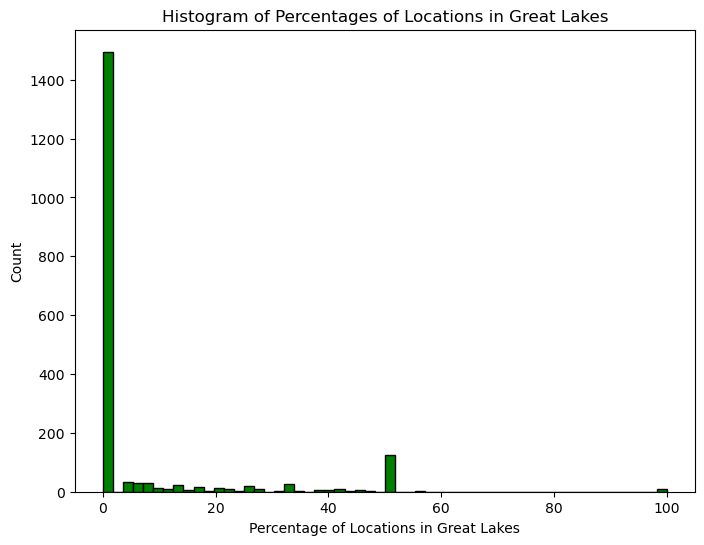

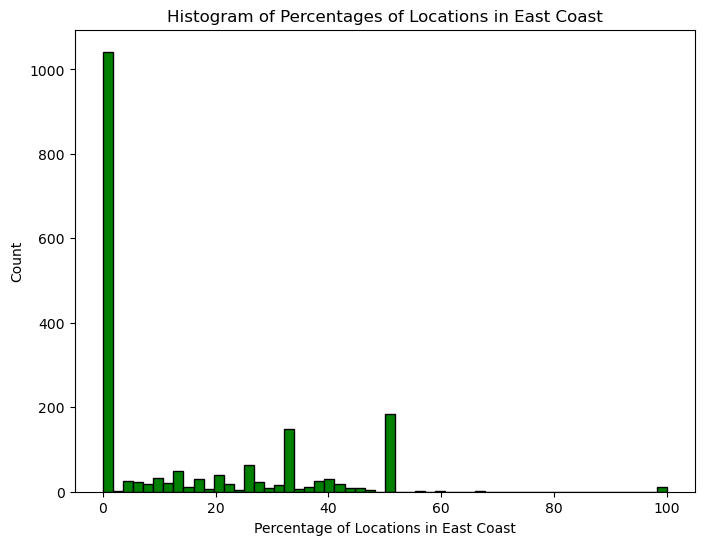

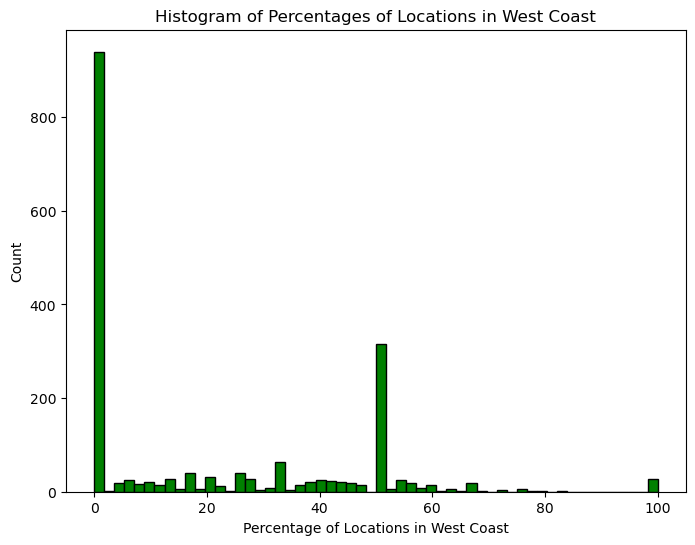

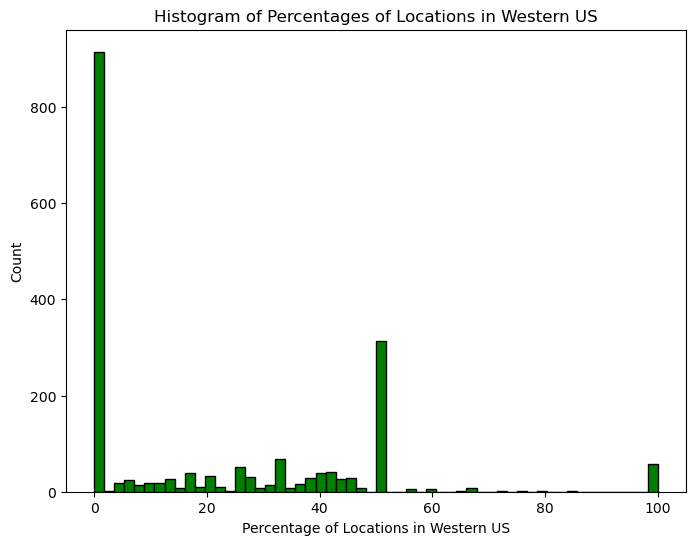

In [51]:
data['Total_Locations'] = data[['Overview.Regions.Midwestern US', 'Overview.Regions.Greater New York Area',
                                'Overview.Regions.Other', 'Overview.Regions.Northeastern US',
                                'Overview.Regions.New England', 'Overview.Regions.Southern US',
                                'Overview.Regions.Great Lakes', 'Overview.Regions.East Coast',
                                'Overview.Regions.West Coast', 'Overview.Regions.Western US']].sum(axis=1)

for region in ['Midwestern US', 'Greater New York Area', 'Other', 'Northeastern US',
               'New England', 'Southern US', 'Great Lakes', 'East Coast',
               'West Coast', 'Western US']:
    data[f'{region}_Percentage'] = (data[f'Overview.Regions.{region}'] / data['Total_Locations']) * 100
    plt.figure(figsize=(8, 6))
    plt.hist(data[region+'_Percentage'], bins=56, color='green', edgecolor='black')
    plt.xlabel('Percentage of Locations in '+region)
    plt.ylabel('Count')
    plt.title('Histogram of Percentages of Locations in '+region)
    plt.show()

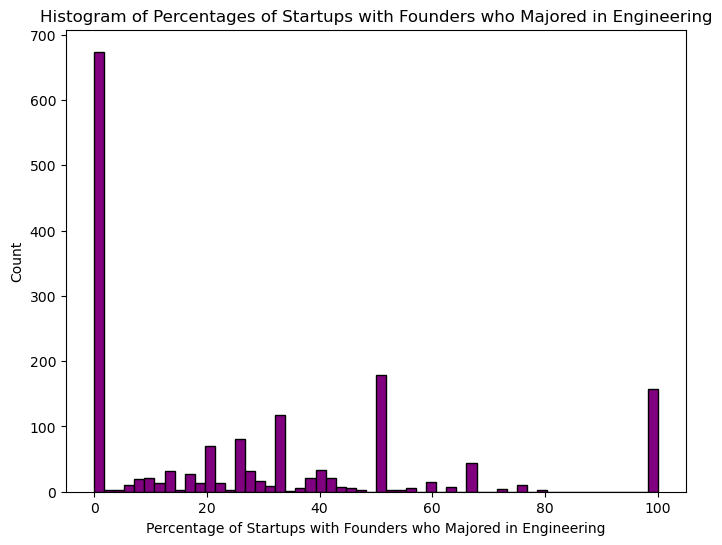

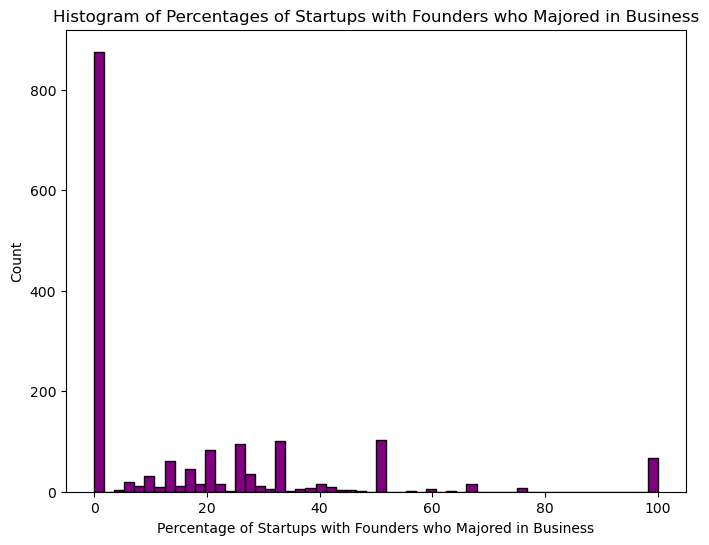

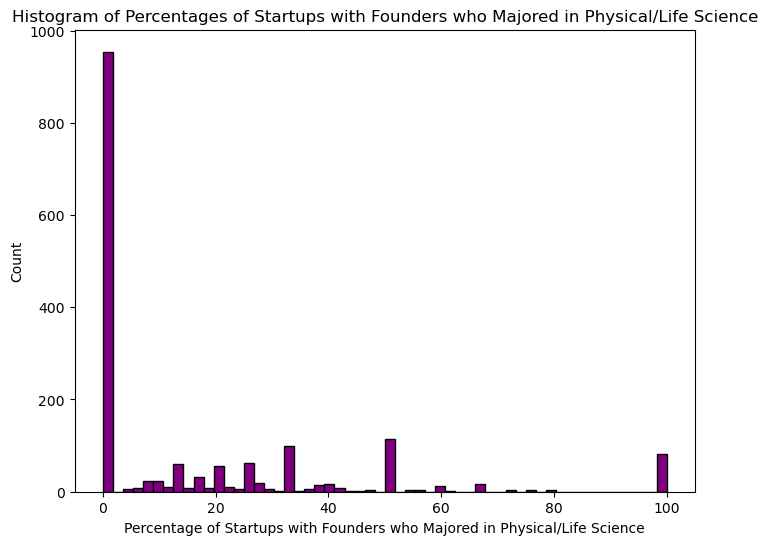

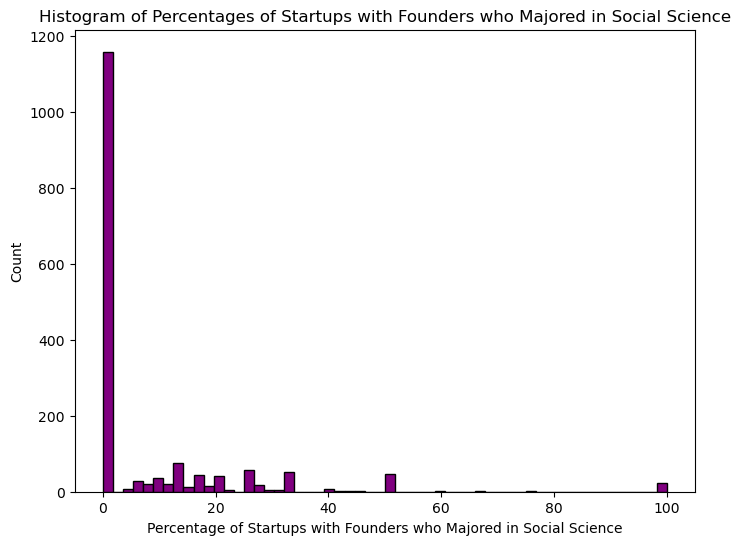

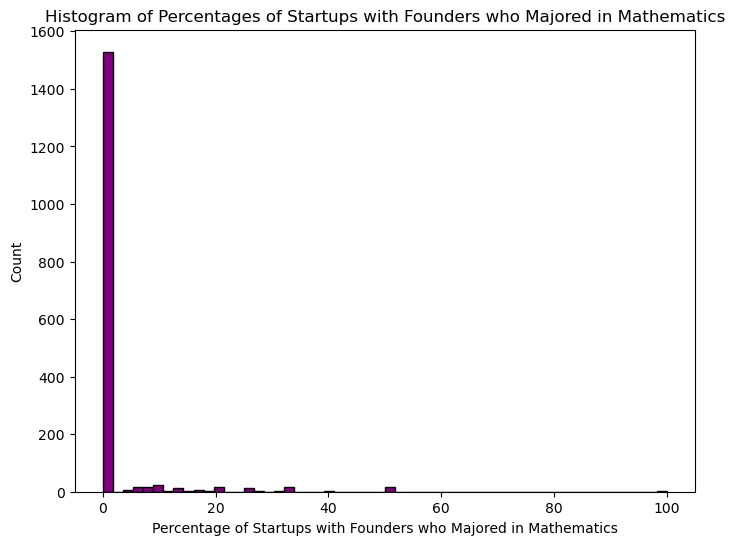

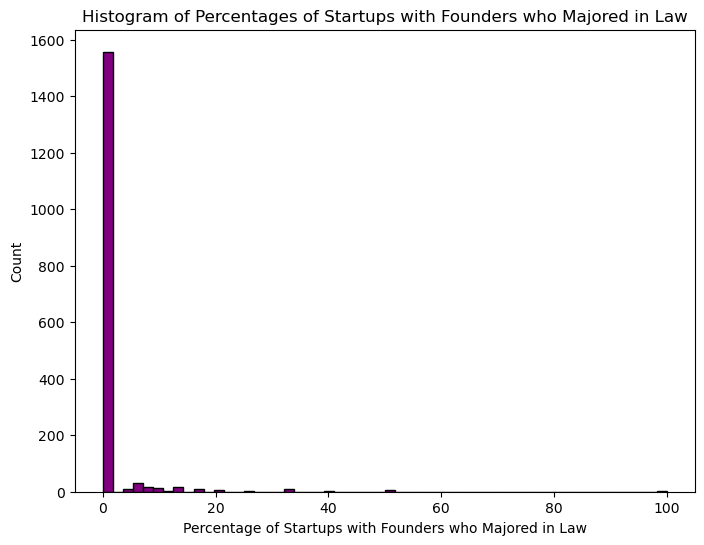

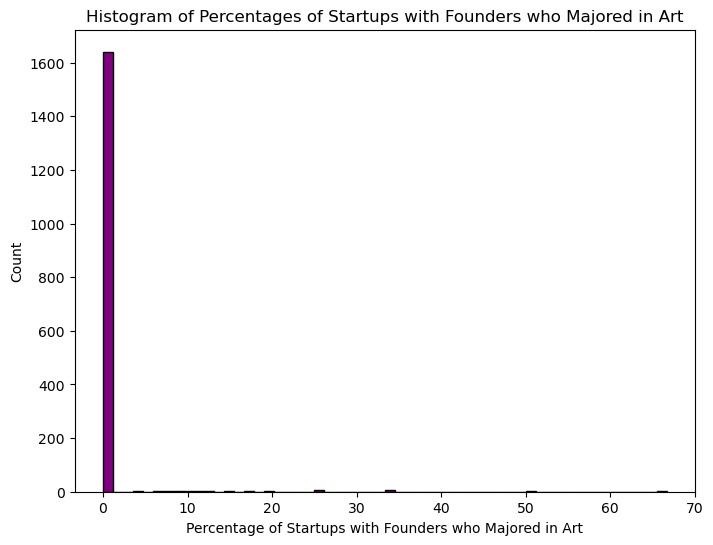

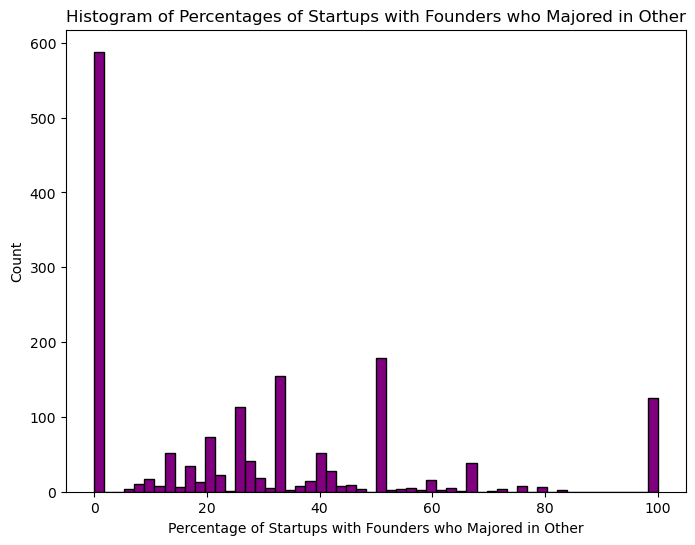

In [67]:
data['Total_Startups'] = data[['Major.Engineering', 'Major.Business', 'Major.Physical/Life Science',
                               'Major.Social Science', 'Major.Mathematics', 'Major.Law', 'Major.Art',
                               'Major.Other']].sum(axis=1)
majors = ['Engineering', 'Business', 'Physical/Life Science', 'Social Science',
          'Mathematics', 'Law', 'Art', 'Other']
for major in majors:
    data[f'{major}_Percentage'] = (data[f'Major.{major}'] / data['Total_Startups']) * 100
    plt.figure(figsize=(8, 6))
    plt.hist(data[major+'_Percentage'], bins=56, color='purple', edgecolor='black')
    plt.xlabel('Percentage of Startups with Founders who Majored in '+major)
    plt.ylabel('Count')
    plt.title('Histogram of Percentages of Startups with Founders who Majored in '+major)
    plt.show()

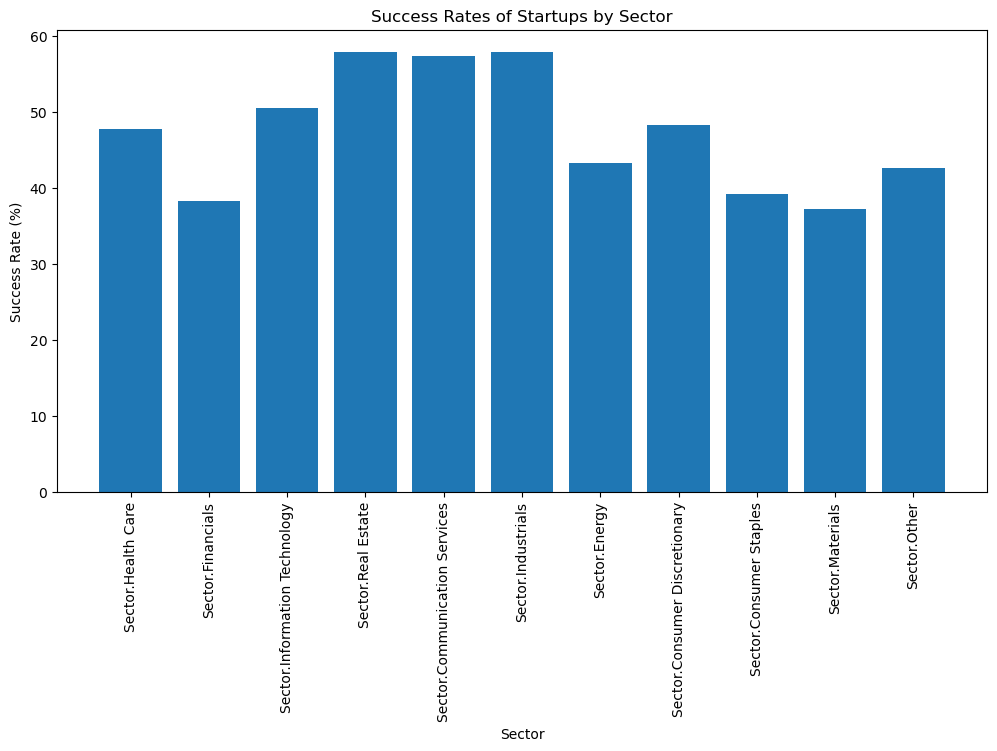

In [69]:
sector_counts = data[['Sector.Health Care', 'Sector.Financials', 'Sector.Information Technology',
                     'Sector.Real Estate', 'Sector.Communication Services', 'Sector.Industrials',
                     'Sector.Energy', 'Sector.Consumer Discretionary', 'Sector.Consumer Staples',
                     'Sector.Materials', 'Sector.Other']].sum()
sector_success_counts = data[data['Target'] == 1][['Sector.Health Care', 'Sector.Financials',
                                                    'Sector.Information Technology', 'Sector.Real Estate',
                                                    'Sector.Communication Services', 'Sector.Industrials',
                                                    'Sector.Energy', 'Sector.Consumer Discretionary',
                                                    'Sector.Consumer Staples', 'Sector.Materials', 'Sector.Other']].sum()
sector_success_rates = (sector_success_counts / sector_counts) * 100
plt.figure(figsize=(12, 6))
plt.bar(sector_success_rates.index, sector_success_rates.values)
plt.xlabel('Sector')
plt.ylabel('Success Rate (%)')
plt.title('Success Rates of Startups by Sector')
plt.xticks(rotation=90)
plt.show()

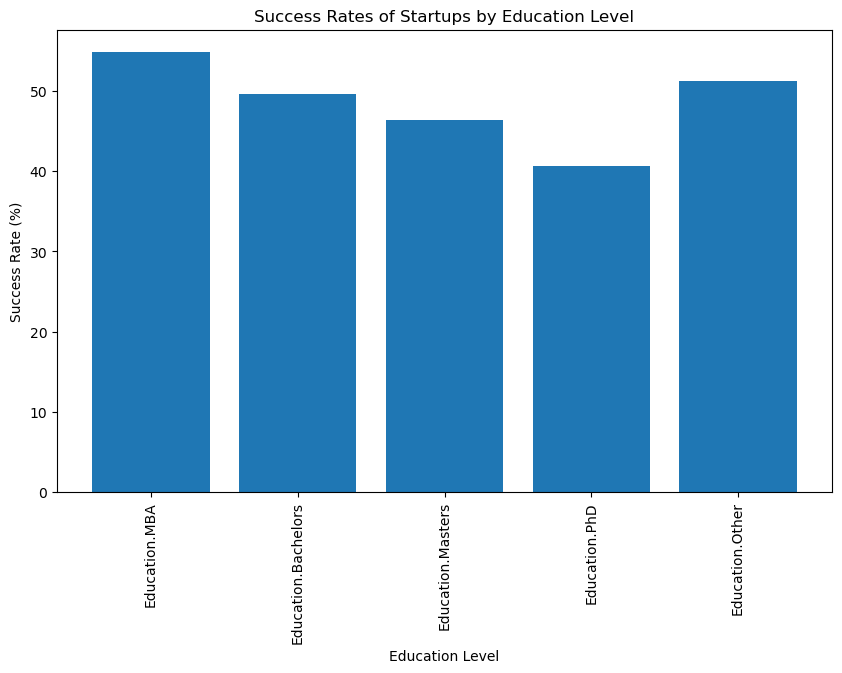

In [71]:
education_counts = data[['Education.MBA', 'Education.Bachelors', 'Education.Masters',
                        'Education.PhD', 'Education.Other']].sum()
education_success_counts = data[data['Target'] == 1][['Education.MBA', 'Education.Bachelors',
                                                      'Education.Masters', 'Education.PhD',
                                                      'Education.Other']].sum()
education_success_rates = (education_success_counts / education_counts) * 100
plt.figure(figsize=(10, 6))
plt.bar(education_success_rates.index, education_success_rates.values)
plt.xlabel('Education Level')
plt.ylabel('Success Rate (%)')
plt.title('Success Rates of Startups by Education Level')
plt.xticks(rotation=90)
plt.show()

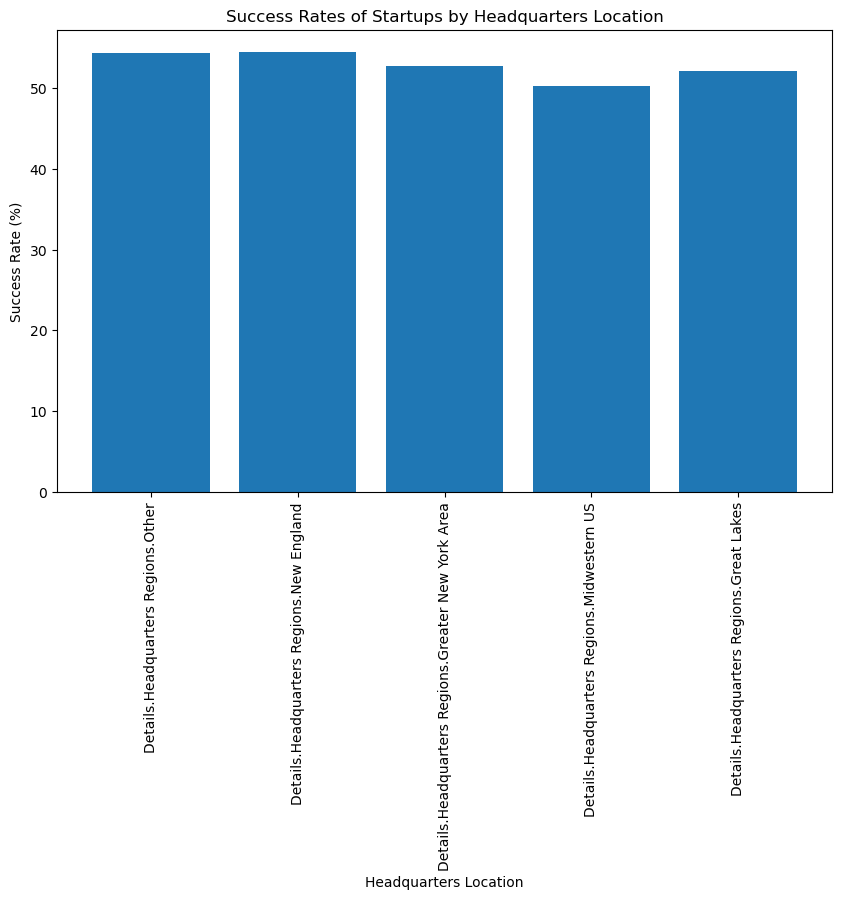

In [73]:
hq_location_counts = data[['Details.Headquarters Regions.Other', 'Details.Headquarters Regions.New England',
                           'Details.Headquarters Regions.Greater New York Area',
                           'Details.Headquarters Regions.Midwestern US',
                           'Details.Headquarters Regions.Great Lakes']].sum()
hq_location_success_counts = data[data['Target'] == 1][['Details.Headquarters Regions.Other',
                                                       'Details.Headquarters Regions.New England',
                                                       'Details.Headquarters Regions.Greater New York Area',
                                                       'Details.Headquarters Regions.Midwestern US',
                                                       'Details.Headquarters Regions.Great Lakes']].sum()
hq_location_success_rates = (hq_location_success_counts / hq_location_counts) * 100
plt.figure(figsize=(10, 6))
plt.bar(hq_location_success_rates.index, hq_location_success_rates.values)
plt.xlabel('Headquarters Location')
plt.ylabel('Success Rate (%)')
plt.title('Success Rates of Startups by Headquarters Location')
plt.xticks(rotation=90)
plt.show()

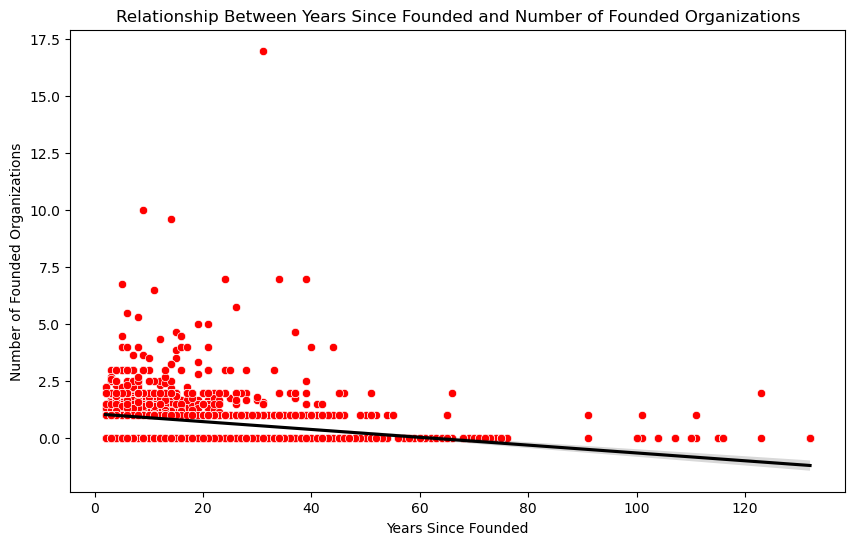

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Details.Years Since Founded', y='Overview.Number of Founded Organizations', data=data, color = "red")
sns.regplot(x='Details.Years Since Founded', y='Overview.Number of Founded Organizations', data=data, scatter=False, color = "black")
plt.xlabel('Years Since Founded')
plt.ylabel('Number of Founded Organizations')
plt.title('Relationship Between Years Since Founded and Number of Founded Organizations')
plt.show()

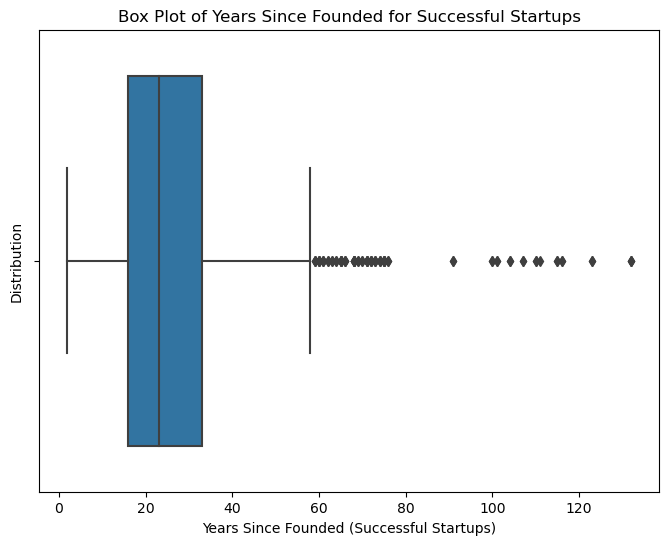

In [93]:
successful_startups = data[data['Target'] == 1]
plt.figure(figsize=(8, 6))
sns.boxplot(x='Details.Years Since Founded', data=successful_startups)
plt.xlabel('Years Since Founded (Successful Startups)')
plt.ylabel('Distribution')
plt.title('Box Plot of Years Since Founded for Successful Startups')
plt.show()

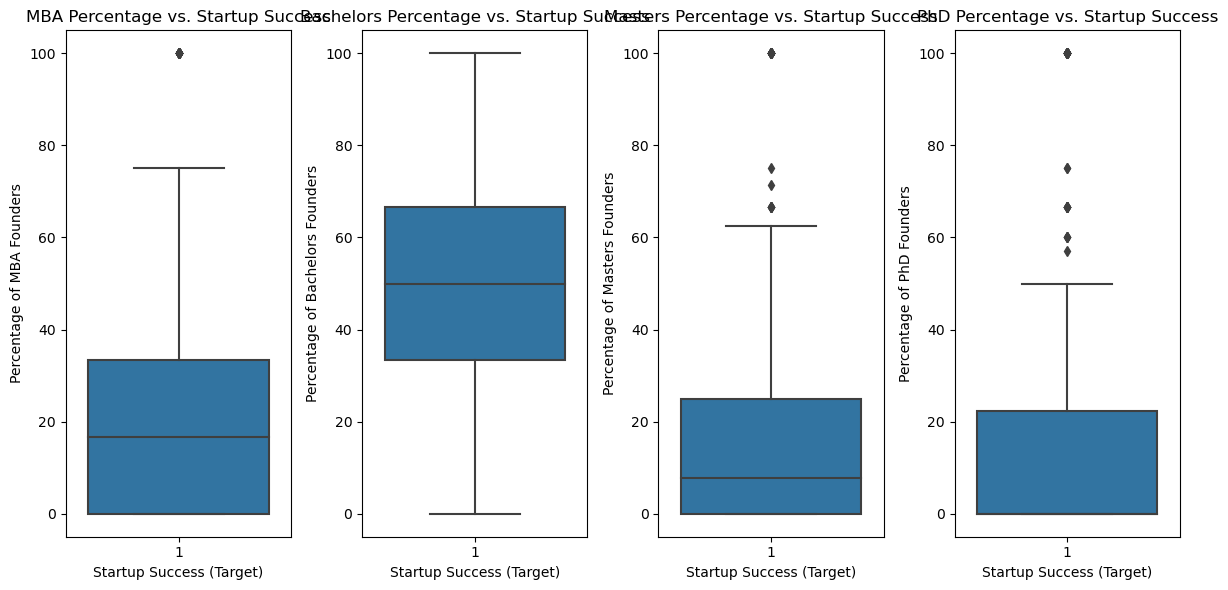

In [97]:
data['MBA_Percentage'] = (data['Education.MBA'] / (data['Education.MBA'] + data['Education.Bachelors'] + data['Education.Masters'] + data['Education.PhD'])) * 100
data['Bachelors_Percentage'] = (data['Education.Bachelors'] / (data['Education.MBA'] + data['Education.Bachelors'] + data['Education.Masters'] + data['Education.PhD'])) * 100
data['Masters_Percentage'] = (data['Education.Masters'] / (data['Education.MBA'] + data['Education.Bachelors'] + data['Education.Masters'] + data['Education.PhD'])) * 100
data['PhD_Percentage'] = (data['Education.PhD'] / (data['Education.MBA'] + data['Education.Bachelors'] + data['Education.Masters'] + data['Education.PhD'])) * 100
successful_startups = data[data['Target'] == 1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
sns.boxplot(x='Target', y='MBA_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of MBA Founders')
plt.title('MBA Percentage vs. Startup Success')

plt.subplot(1, 4, 2)
sns.boxplot(x='Target', y='Bachelors_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of Bachelors Founders')
plt.title('Bachelors Percentage vs. Startup Success')

plt.subplot(1, 4, 3)
sns.boxplot(x='Target', y='Masters_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of Masters Founders')
plt.title('Masters Percentage vs. Startup Success')

plt.subplot(1, 4, 4)
sns.boxplot(x='Target', y='PhD_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of PhD Founders')
plt.title('PhD Percentage vs. Startup Success')

plt.tight_layout()
plt.show()

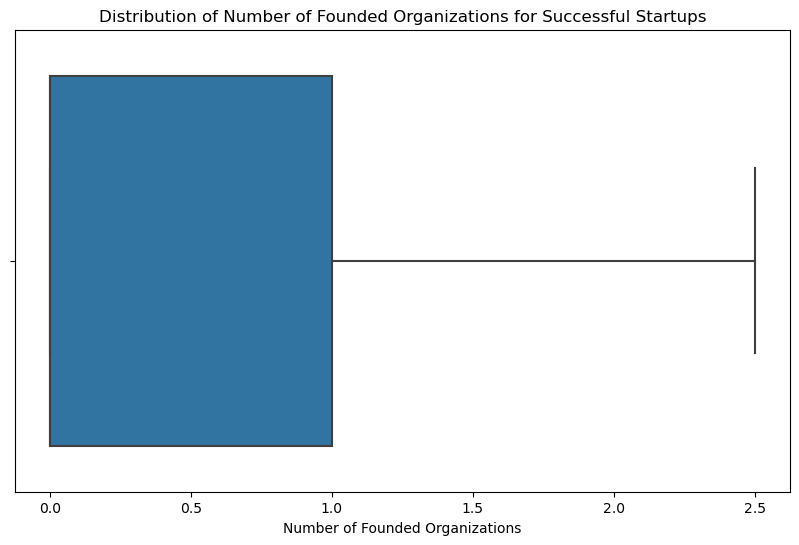

In [99]:
successful_startups = data[data['Target'] == 1]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overview.Number of Founded Organizations', data=successful_startups, showfliers=False)
plt.xlabel('Number of Founded Organizations')
plt.title('Distribution of Number of Founded Organizations for Successful Startups')
plt.show()

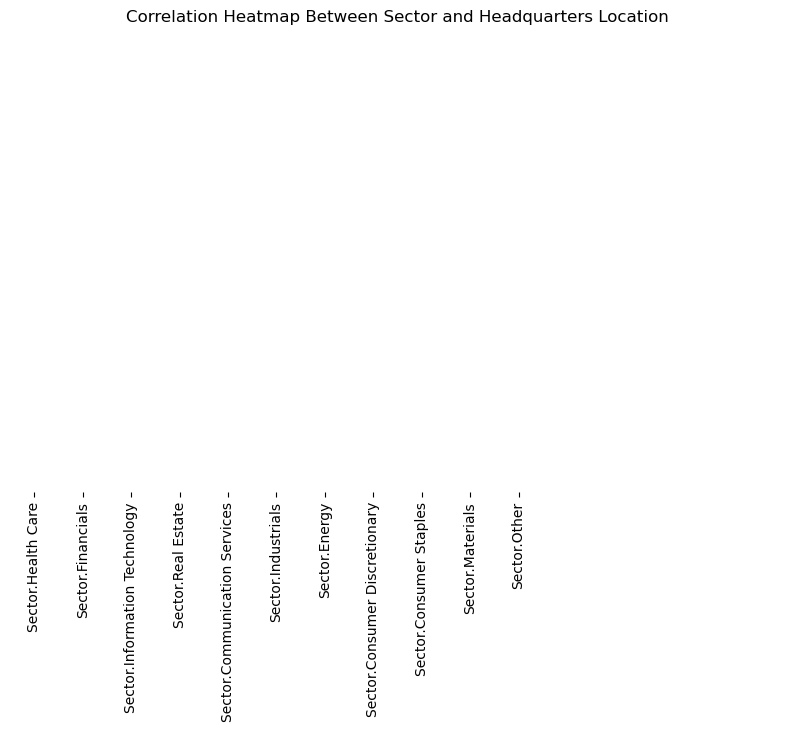

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data.csv")

sectors = data[['Sector.Health Care', 'Sector.Financials', 'Sector.Information Technology',
                'Sector.Real Estate', 'Sector.Communication Services', 'Sector.Industrials',
                'Sector.Energy', 'Sector.Consumer Discretionary', 'Sector.Consumer Staples',
                'Sector.Materials', 'Sector.Other']]
headquarters = data[['Details.Headquarters Regions.Other', 'Details.Headquarters Regions.New England',
                     'Details.Headquarters Regions.Greater New York Area',
                     'Details.Headquarters Regions.Midwestern US',
                     'Details.Headquarters Regions.Great Lakes']]

sectors = sectors.fillna(0)
headquarters = headquarters.fillna(0)

correlation_matrix = sectors.corrwith(headquarters)
vmin = -1.0
vmax = 1.0

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.values.reshape(1, -1), annot=True, cmap='coolwarm', cbar=False,
            xticklabels=sectors.columns, vmin=vmin, vmax=vmax)
plt.title('Correlation Heatmap Between Sector and Headquarters Location')
plt.xticks(rotation=90)
plt.yticks([])
plt.show()

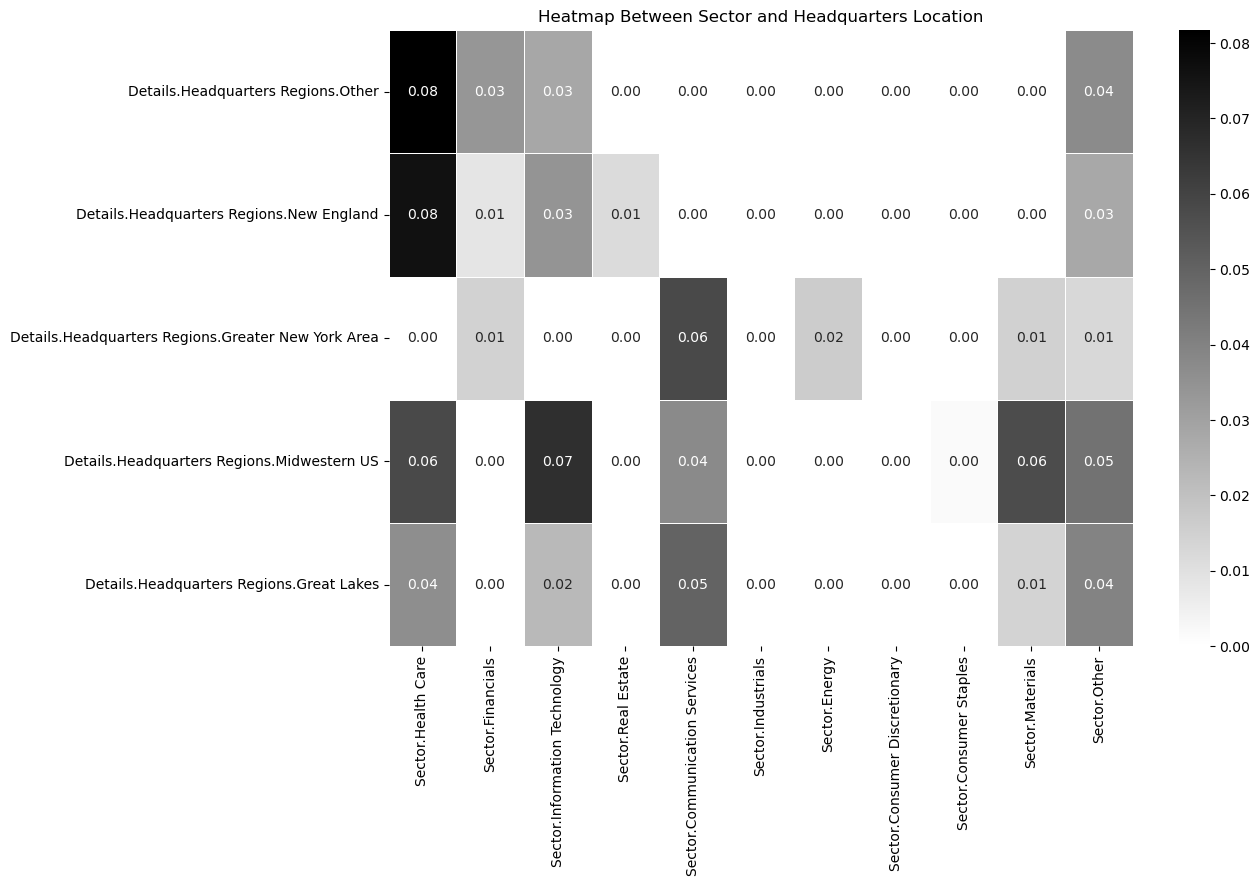

In [4]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data.csv")

sectors = data[['Sector.Health Care', 'Sector.Financials', 'Sector.Information Technology',
                'Sector.Real Estate', 'Sector.Communication Services', 'Sector.Industrials',
                'Sector.Energy', 'Sector.Consumer Discretionary', 'Sector.Consumer Staples',
                'Sector.Materials', 'Sector.Other']]
headquarters = data[['Details.Headquarters Regions.Other', 'Details.Headquarters Regions.New England',
                     'Details.Headquarters Regions.Greater New York Area',
                     'Details.Headquarters Regions.Midwestern US',
                     'Details.Headquarters Regions.Great Lakes']]

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramer_v_matrix = pd.DataFrame(np.nan, columns=sectors.columns, index=headquarters.columns)
for sector_col in sectors.columns:
    for hq_col in headquarters.columns:
        cramer_v_matrix.at[hq_col, sector_col] = cramers_v(headquarters[hq_col], sectors[sector_col])

plt.figure(figsize=(12, 8))
sns.heatmap(cramer_v_matrix, annot=True, cmap='gray_r', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Between Sector and Headquarters Location')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

data = pd.read_csv("data.csv")
data.shape

(3160, 50)

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data.csv')
X = data.drop('Target', axis=1)
y = data['Target']

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

feature_importances = clf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

                                              Feature  Importance
48                        Details.Years Since Founded    0.371403
16           Overview.Number of Founded Organizations    0.109728
19                               Overview.Gender.Male    0.066596
31                        Overview.Regions.West Coast    0.021895
32                        Overview.Regions.Western US    0.021407
40                                  Major.Engineering    0.020877
47                                        Major.Other    0.020874
15                                       Sector.Other    0.019444
36                                Education.Bachelors    0.019325
18                             Overview.Gender.Female    0.016826
7                       Sector.Information Technology    0.016572
30                        Overview.Regions.East Coast    0.015566
5                                  Sector.Health Care    0.015546
10                                 Sector.Industrials    0.014855
38        

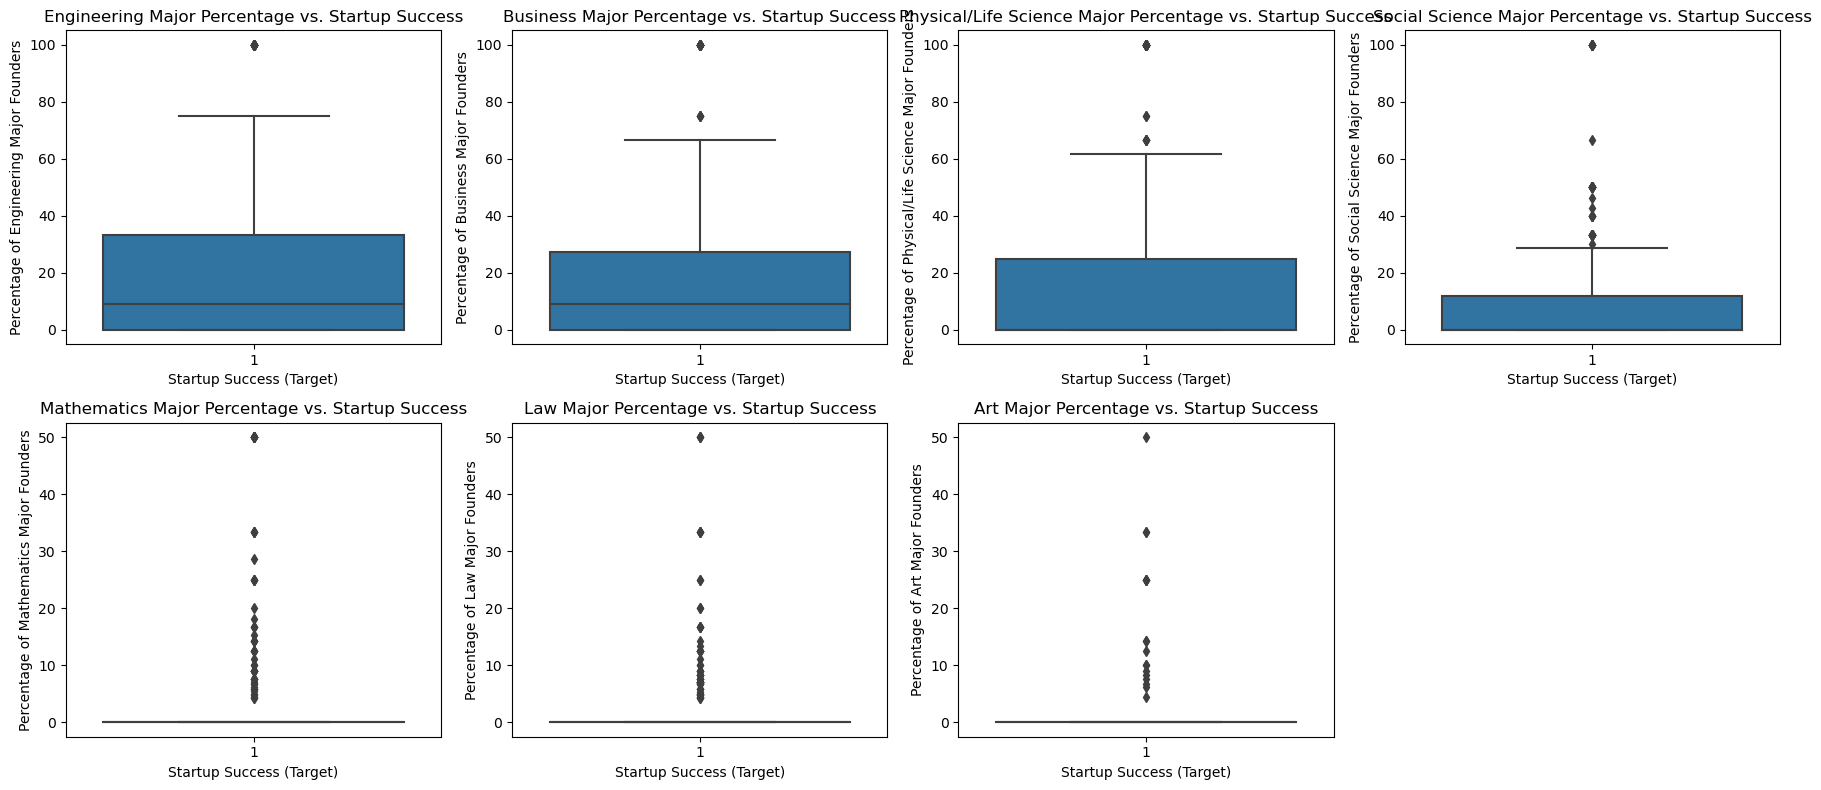

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Engineering_Percentage'] = (data['Major.Engineering'] / (data['Major.Engineering'] + data['Major.Business'] + data['Major.Physical/Life Science'] + data['Major.Social Science'] + data['Major.Mathematics'] + data['Major.Law'] + data['Major.Art'] + data['Major.Other'])) * 100
data['Business_Percentage'] = (data['Major.Business'] / (data['Major.Engineering'] + data['Major.Business'] + data['Major.Physical/Life Science'] + data['Major.Social Science'] + data['Major.Mathematics'] + data['Major.Law'] + data['Major.Art'] + data['Major.Other'])) * 100
data['Physical_Life_Science_Percentage'] = (data['Major.Physical/Life Science'] / (data['Major.Engineering'] + data['Major.Business'] + data['Major.Physical/Life Science'] + data['Major.Social Science'] + data['Major.Mathematics'] + data['Major.Law'] + data['Major.Art'] + data['Major.Other'])) * 100
data['Social_Science_Percentage'] = (data['Major.Social Science'] / (data['Major.Engineering'] + data['Major.Business'] + data['Major.Physical/Life Science'] + data['Major.Social Science'] + data['Major.Mathematics'] + data['Major.Law'] + data['Major.Art'] + data['Major.Other'])) * 100
data['Mathematics_Percentage'] = (data['Major.Mathematics'] / (data['Major.Engineering'] + data['Major.Business'] + data['Major.Physical/Life Science'] + data['Major.Social Science'] + data['Major.Mathematics'] + data['Major.Law'] + data['Major.Art'] + data['Major.Other'])) * 100
data['Law_Percentage'] = (data['Major.Law'] / (data['Major.Engineering'] + data['Major.Business'] + data['Major.Physical/Life Science'] + data['Major.Social Science'] + data['Major.Mathematics'] + data['Major.Law'] + data['Major.Art'] + data['Major.Other'])) * 100
data['Art_Percentage'] = (data['Major.Art'] / (data['Major.Engineering'] + data['Major.Business'] + data['Major.Physical/Life Science'] + data['Major.Social Science'] + data['Major.Mathematics'] + data['Major.Law'] + data['Major.Art'] + data['Major.Other'])) * 100

successful_startups = data[data['Target'] == 1]

plt.figure(figsize=(18, 8))

plt.subplot(2, 4, 1)
sns.boxplot(x='Target', y='Engineering_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of Engineering Major Founders')
plt.title('Engineering Major Percentage vs. Startup Success')

plt.subplot(2, 4, 2)
sns.boxplot(x='Target', y='Business_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of Business Major Founders')
plt.title('Business Major Percentage vs. Startup Success')

plt.subplot(2, 4, 3)
sns.boxplot(x='Target', y='Physical_Life_Science_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of Physical/Life Science Major Founders')
plt.title('Physical/Life Science Major Percentage vs. Startup Success')

plt.subplot(2, 4, 4)
sns.boxplot(x='Target', y='Social_Science_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of Social Science Major Founders')
plt.title('Social Science Major Percentage vs. Startup Success')

plt.subplot(2, 4, 5)
sns.boxplot(x='Target', y='Mathematics_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of Mathematics Major Founders')
plt.title('Mathematics Major Percentage vs. Startup Success')

plt.subplot(2, 4, 6)
sns.boxplot(x='Target', y='Law_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of Law Major Founders')
plt.title('Law Major Percentage vs. Startup Success')

plt.subplot(2, 4, 7)
sns.boxplot(x='Target', y='Art_Percentage', data=successful_startups)
plt.xlabel('Startup Success (Target)')
plt.ylabel('Percentage of Art Major Founders')
plt.title('Art Major Percentage vs. Startup Success')

plt.tight_layout()
plt.show()

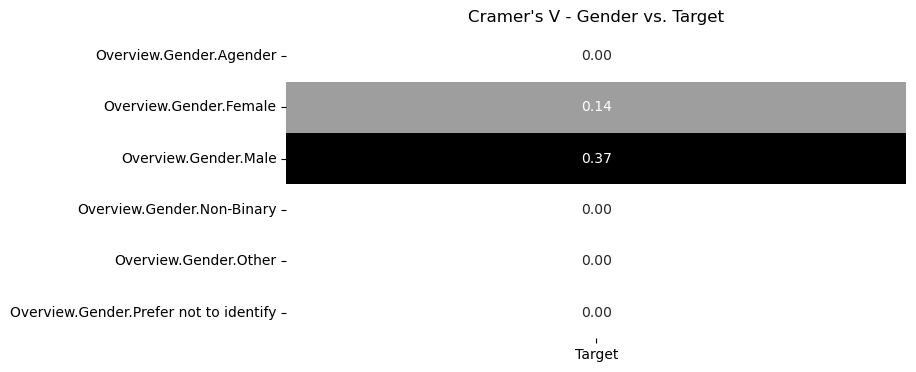

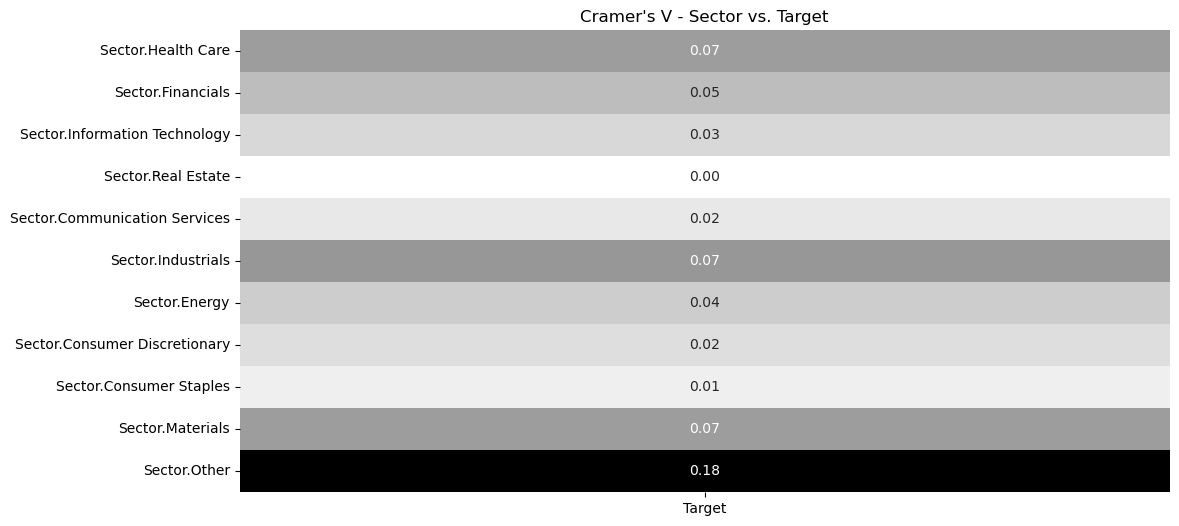

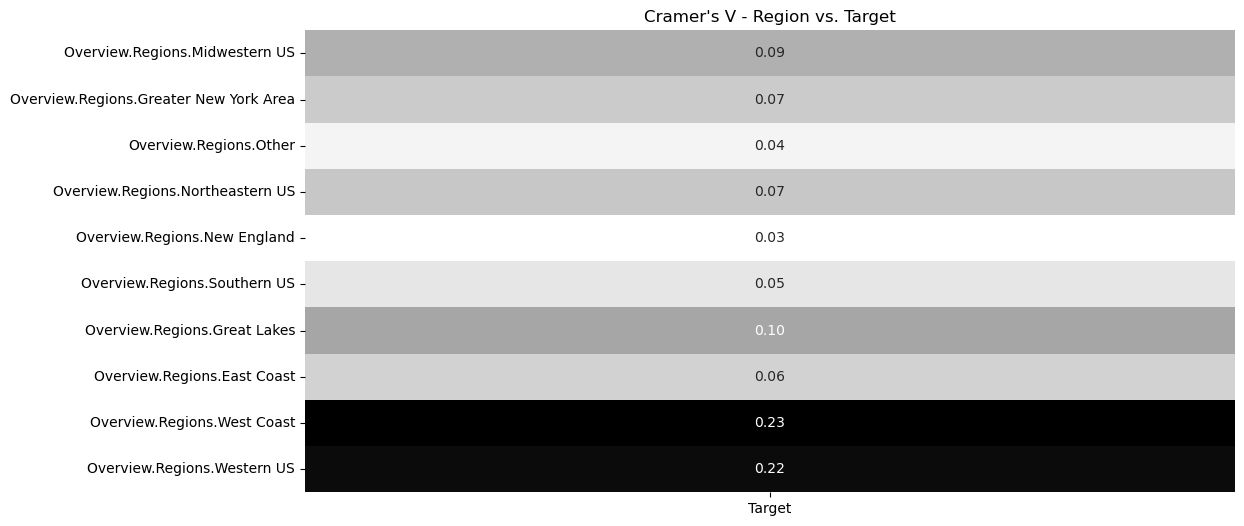

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

data = pd.read_csv('data.csv')

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    
    if n == 0:
        return 0.0  
    
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    if (k == 1) or (r == 1):
        return 0.0  
    
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

gender_columns = ['Overview.Gender.Agender', 'Overview.Gender.Female', 'Overview.Gender.Male', 'Overview.Gender.Non-Binary', 'Overview.Gender.Other', 'Overview.Gender.Prefer not to identify']
gender_vs_target = pd.DataFrame(index=gender_columns, columns=['Target'])

for gender in gender_columns:
    gender_vs_target.loc[gender, 'Target'] = cramers_v(data[gender], data['Target'])

gender_vs_target = gender_vs_target.astype(float)

plt.figure(figsize=(8, 4))
sns.heatmap(gender_vs_target, annot=True, cmap='gray_r', fmt=".2f", cbar=False)
plt.title("Cramer's V - Gender vs. Target")
plt.show()

sector_columns = ['Sector.Health Care', 'Sector.Financials', 'Sector.Information Technology', 'Sector.Real Estate', 'Sector.Communication Services', 'Sector.Industrials', 'Sector.Energy', 'Sector.Consumer Discretionary', 'Sector.Consumer Staples', 'Sector.Materials', 'Sector.Other']
sector_vs_target = pd.DataFrame(index=sector_columns, columns=['Target'])

for sector in sector_columns:
    sector_vs_target.loc[sector, 'Target'] = cramers_v(data[sector], data['Target'])

sector_vs_target = sector_vs_target.astype(float)

plt.figure(figsize=(12, 6))
sns.heatmap(sector_vs_target, annot=True, cmap='gray_r', fmt=".2f", cbar=False)
plt.title("Cramer's V - Sector vs. Target")
plt.show()

region_columns = ['Overview.Regions.Midwestern US', 'Overview.Regions.Greater New York Area', 'Overview.Regions.Other', 'Overview.Regions.Northeastern US', 'Overview.Regions.New England', 'Overview.Regions.Southern US', 'Overview.Regions.Great Lakes', 'Overview.Regions.East Coast', 'Overview.Regions.West Coast', 'Overview.Regions.Western US']
region_vs_target = pd.DataFrame(index=region_columns, columns=['Target'])

for region in region_columns:
    region_vs_target.loc[region, 'Target'] = cramers_v(data[region], data['Target'])

region_vs_target = region_vs_target.astype(float)

plt.figure(figsize=(12, 6))
sns.heatmap(region_vs_target, annot=True, cmap='gray_r', fmt=".2f", cbar=False)
plt.title("Cramer's V - Region vs. Target")
plt.show()


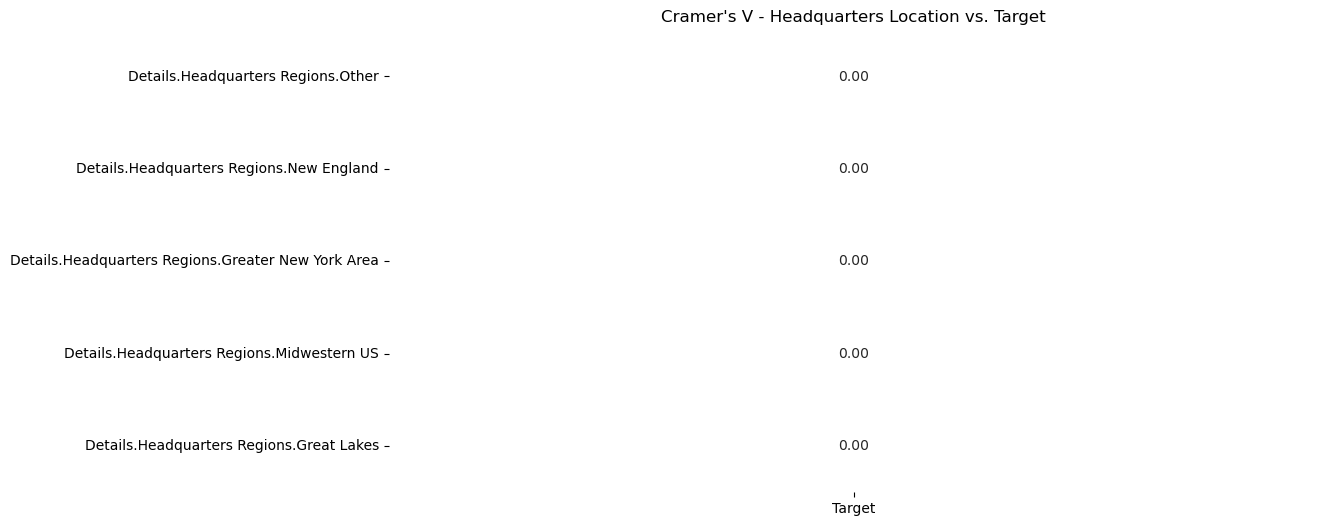

In [37]:
hq_columns = ['Details.Headquarters Regions.Other', 'Details.Headquarters Regions.New England', 'Details.Headquarters Regions.Greater New York Area', 'Details.Headquarters Regions.Midwestern US', 'Details.Headquarters Regions.Great Lakes']
hq_vs_target = pd.DataFrame(index=hq_columns, columns=['Target'])

for hq_location in hq_columns:
    hq_vs_target.loc[hq_location, 'Target'] = cramers_v(data[hq_location], data['Target'])

hq_vs_target = hq_vs_target.astype(float)

plt.figure(figsize=(12, 6))
sns.heatmap(hq_vs_target, annot=True, cmap='gray_r', fmt=".2f", cbar=False)
plt.title("Cramer's V - Headquarters Location vs. Target")
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('data.csv')

X = data.drop(columns=['Target'])  
y = data['Target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

for index, row in results_df.iterrows():
    actual = row['Actual']
    predicted = row['Predicted']
    if actual != predicted:
        print(f"{index} - Actual: {actual}, Predicted: {predicted}")



Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       304
           1       0.75      0.80      0.77       328

    accuracy                           0.76       632
   macro avg       0.76      0.76      0.76       632
weighted avg       0.76      0.76      0.76       632

1052 - Actual: 1, Predicted: 0
1407 - Actual: 1, Predicted: 0
443 - Actual: 0, Predicted: 1
2299 - Actual: 0, Predicted: 1
2029 - Actual: 1, Predicted: 0
1991 - Actual: 0, Predicted: 1
1316 - Actual: 0, Predicted: 1
2494 - Actual: 1, Predicted: 0
2045 - Actual: 1, Predicted: 0
1620 - Actual: 0, Predicted: 1
578 - Actual: 0, Predicted: 1
368 - Actual: 0, Predicted: 1
598 - Actual: 1, Predicted: 0
3026 - Actual: 0, Predicted: 1
2887 - Actual: 1, Predicted: 0
2844 - Actual: 0, Predicted: 1
178 - Actual: 1, Predicted: 0
218 - Actual: 0, Predicted: 1
211 - Actual: 0, Predicted: 1
1667 - Actual: 0, Predicted: 1
1537 - Actual: 0, Pre

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('data.csv')

# Define the features and target variable
features = [
    'Details.Years Since Founded',
    'Overview.Number of Founded Organizations',
    # Add the columns you want to use as features here
    'Details.Headquarters Regions.Other',
    'Details.Headquarters Regions.New England',
    'Details.Headquarters Regions.Greater New York Area',
    'Details.Headquarters Regions.Midwestern US',
    'Details.Headquarters Regions.Great Lakes',
    'Sector.Health Care',
    'Sector.Financials',
    'Sector.Information Technology',
    'Sector.Real Estate',
    'Sector.Communication Services',
    'Sector.Industrials',
    'Sector.Energy',
    'Sector.Consumer Discretionary',
    'Sector.Consumer Staples',
    'Sector.Materials',
    'Sector.Other',
    'Overview.Gender.Agender',
    'Overview.Gender.Female',
    'Overview.Gender.Male',
    'Overview.Gender.Non-Binary',
    'Overview.Gender.Other',
    'Overview.Gender.Prefer not to identify',
    'Overview.Regions.Midwestern US',
    'Overview.Regions.Greater New York Area',
    'Overview.Regions.Other',
    'Overview.Regions.Northeastern US',
    'Overview.Regions.New England',
    'Overview.Regions.Southern US',
    'Overview.Regions.Great Lakes',
    'Overview.Regions.East Coast',
    'Overview.Regions.West Coast',
    'Overview.Regions.Western US',
    'Education.0.Prestigious University',
    'Education.1.Prestigious University',
    'Education.MBA',
    'Education.Bachelors',
    'Education.Masters',
    'Education.PhD',
    'Education.Other',
    'Major.Engineering',
    'Major.Business',
    'Major.Physical/Life Science',
    'Major.Social Science',
    'Major.Mathematics',
    'Major.Law',
    'Major.Art',
    'Major.Other',
]

target = 'Target'  # The column you want to predict (startup success)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       304
           1       0.75      0.80      0.77       328

    accuracy                           0.76       632
   macro avg       0.76      0.75      0.76       632
weighted avg       0.76      0.76      0.76       632



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('data.csv')

# Define the features and target variable
features = [
    'Details.Years Since Founded',
    'Overview.Number of Founded Organizations',
    # Add the columns you want to use as features here
    'Details.Headquarters Regions.Other',
    'Details.Headquarters Regions.New England',
    'Details.Headquarters Regions.Greater New York Area',
    'Details.Headquarters Regions.Midwestern US',
    'Details.Headquarters Regions.Great Lakes',
    'Sector.Health Care',
    'Sector.Financials',
    'Sector.Information Technology',
    'Sector.Real Estate',
    'Sector.Communication Services',
    'Sector.Industrials',
    'Sector.Energy',
    'Sector.Consumer Discretionary',
    'Sector.Consumer Staples',
    'Sector.Materials',
    'Sector.Other',
    'Overview.Gender.Agender',
    'Overview.Gender.Female',
    'Overview.Gender.Male',
    'Overview.Gender.Non-Binary',
    'Overview.Gender.Other',
    'Overview.Gender.Prefer not to identify',
    'Overview.Regions.Midwestern US',
    'Overview.Regions.Greater New York Area',
    'Overview.Regions.Other',
    'Overview.Regions.Northeastern US',
    'Overview.Regions.New England',
    'Overview.Regions.Southern US',
    'Overview.Regions.Great Lakes',
    'Overview.Regions.East Coast',
    'Overview.Regions.West Coast',
    'Overview.Regions.Western US',
    'Education.0.Prestigious University',
    'Education.1.Prestigious University',
    'Education.MBA',
    'Education.Bachelors',
    'Education.Masters',
    'Education.PhD',
    'Education.Other',
    'Major.Engineering',
    'Major.Business',
    'Major.Physical/Life Science',
    'Major.Social Science',
    'Major.Mathematics',
    'Major.Law',
    'Major.Art',
    'Major.Other',
]


target = 'Target'  # The column you want to predict (startup success)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier (change DecisionTreeClassifier to RandomForestClassifier)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Print the results for the Random Forest model
print('Random Forest Model Results:')
print(f'Accuracy: {accuracy_rf:.2f}')
print('Classification Report:')
print(report_rf)


Random Forest Model Results:
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       304
           1       0.81      0.85      0.83       328

    accuracy                           0.82       632
   macro avg       0.82      0.82      0.82       632
weighted avg       0.82      0.82      0.82       632



In [3]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
print('Gradient Boosting Model Results:')
print(f'Accuracy: {accuracy_gb:.2f}')
print('Classification Report:')
print(report_gb)


Gradient Boosting Model Results:
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       304
           1       0.80      0.85      0.83       328

    accuracy                           0.81       632
   macro avg       0.82      0.81      0.81       632
weighted avg       0.82      0.81      0.81       632



In [5]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(f'Cross-Validation Mean Accuracy: {cv_scores.mean():.2f}')


Cross-Validation Mean Accuracy: 0.84


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('data.csv')

# Split the dataset into features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the model's accuracy and report
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

# Function to predict the success probability of a startup
def predict_success_probability(input_data):
    # Transform the input data using the same scaler used for training
    input_scaled = scaler.transform([input_data])
    
    # Predict the probability of success
    probability = model.predict_proba(input_scaled)[0][1] * 100  # Probability of being class 1 (successful)
    return f"The predicted probability of the startup being successful is {probability:.2f}%."


input_data = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print(predict_success_probability(input_data))


Model Accuracy: 0.8080168776371308
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       454
           1       0.82      0.81      0.81       494

    accuracy                           0.81       948
   macro avg       0.81      0.81      0.81       948
weighted avg       0.81      0.81      0.81       948

The predicted probability of the startup being successful is 2.36%.


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('data.csv')

# Split the dataset into features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Training the Random Forest model on the entire dataset
rf_model.fit(X_scaled, y)

# Function to predict the success probability of a startup
def predict_success_probability(input_data):
    # Transform the input data using the same scaler used for training
    input_scaled = scaler.transform([input_data])
    
    # Predict the probability of success
    probability = rf_model.predict_proba(input_scaled)[0][1] * 100  # Probability of being class 1 (successful)
    return f"The predicted probability of the startup being successful is {probability:.2f}%."

# Example usage:
input_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print(predict_success_probability(input_data))


The predicted probability of the startup being successful is 21.90%.


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Feature Engineering (example, modify according to your dataset)
# data['NewFeature'] = data['Feature1'] * data['Feature2']

# Split the dataset into features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest Classifier with Grid Search for Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_scaled, y)

best_rf_model = grid_search.best_estimator_

# Function to predict the success probability of a startup
def predict_success_probability(input_data):
    input_scaled = scaler.transform([input_data])
    probability = best_rf_model.predict_proba(input_scaled)[0][1] * 100
    return f"The predicted probability of the startup being successful is {probability:.2f}%."

input_data = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print(predict_success_probability(input_data))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
The predicted probability of the startup being successful is 16.55%.


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


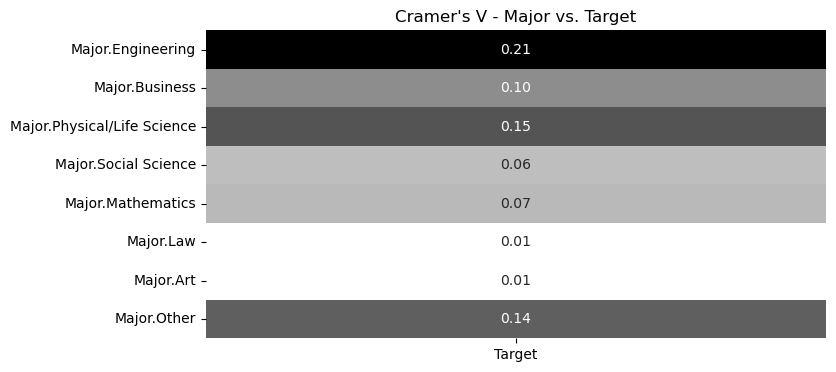

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

data = pd.read_csv('data.csv')

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    
    if n == 0:
        return 0.0  
    
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    if (k == 1) or (r == 1):
        return 0.0  
    
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

gender_columns = ['Major.Engineering', 'Major.Business', 'Major.Physical/Life Science', 'Major.Social Science', 'Major.Mathematics', 'Major.Law', 'Major.Art', 'Major.Other']
gender_vs_target = pd.DataFrame(index=gender_columns, columns=['Target'])

for gender in gender_columns:
    gender_vs_target.loc[gender, 'Target'] = cramers_v(data[gender], data['Target'])

gender_vs_target = gender_vs_target.astype(float)

plt.figure(figsize=(8, 4))
sns.heatmap(gender_vs_target, annot=True, cmap='gray_r', fmt=".2f", cbar=False)
plt.title("Cramer's V - Major vs. Target")
plt.show()

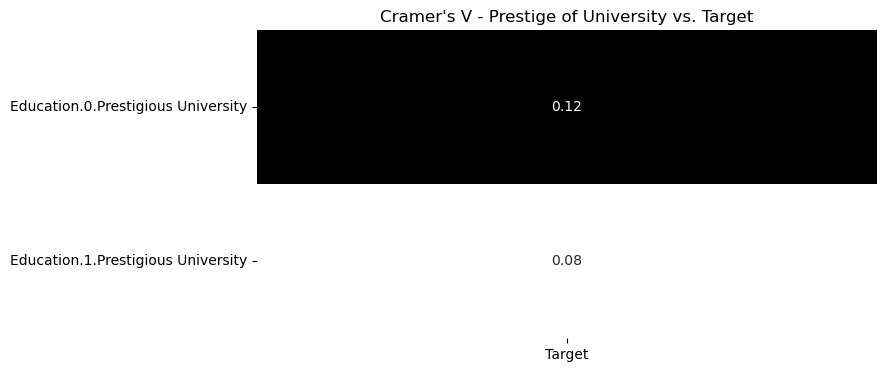

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

data = pd.read_csv('data.csv')

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    
    if n == 0:
        return 0.0  
    
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    if (k == 1) or (r == 1):
        return 0.0  
    
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

gender_columns = ['Education.0.Prestigious University', 'Education.1.Prestigious University']
gender_vs_target = pd.DataFrame(index=gender_columns, columns=['Target'])

for gender in gender_columns:
    gender_vs_target.loc[gender, 'Target'] = cramers_v(data[gender], data['Target'])

gender_vs_target = gender_vs_target.astype(float)

plt.figure(figsize=(8, 4))
sns.heatmap(gender_vs_target, annot=True, cmap='gray_r', fmt=".2f", cbar=False)
plt.title("Cramer's V - Prestige of University vs. Target")
plt.show()